# Diabetes Prediction Using Different Supervised Machine Learning Classifiers 

## We've used below libraries :

<ul>
<li>Numpy</li>
<li>Pandas</li>
<li>scipy</li>
<li>Seaborn</li>
<li>Sklearn</li>
</ul>

### Load packagaes

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import seaborn as sns
# sns.set(style="whitegrid")
import warnings 
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, NuSVC
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
# from tflearn.data_utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from keras.utils import to_categorical
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy import stats
from scipy.stats import uniform, randint
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report
from scipy import interp

### Microservices

In [61]:
loaded_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTv03yjUMskcQXdIqAs800W-5T4EU8J31WQXwkQ9SQHU56f3mqZAxk5yx0d6PlLny4-KfF9QszeyHGu/pub?output=csv')

### Read the data from the drive using pandas (Python Data Analysis Library)

In [62]:
list_all_models=[]                    #every classifier auc values are stored in it
New_features= []               #Feature that are renamed
random_initializer=100            #random initializer
n_dots=50
##########################################################

for i in range(8):
  #for renaming dataset of columns features F1 -- F8 
  New_features.append('F'+str(i+1)) 
##-------------------------------------------------##

# Gaussian distribution 
def Box_Gaussian(loaded_data):
  fig=plt.figure(figsize=(15,6))                                #define figure size
  fig.suptitle("Box Gaussian plot of all features")  
  n_scaler = preprocessing.StandardScaler()                 #standardization function
  temp_Data = n_scaler.fit_transform(loaded_data)                  #pass into function for standrd.
  for i in range(8):                                        #loop for all 8 feature     
    plt.subplot(2, 4, i+1)                                  #subplot for 2 rows in 4 columns
    Data = temp_Data[:,i]                                   #data for every feature
    sns.kdeplot(Data, shade=True,color='red', alpha=0.3)    #kernel density function under red shaded arae
    ax = sns.boxplot(Data, saturation=0.9, color="green")   #This gives green shaded area
    plt.gca().invert_yaxis()                                #Y-Axis in reversed PyPlot
    # plt.title('F'+str(i+1))
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])                    #removing xlabel data 
    plt.ylim((-0.5,0.65))                                   #y axis  limit
    plt.tight_layout()                                      #This module provides routines to adjust subplot params so that subplots are nicely fit in the figure.
    
    for patch in ax.artists:
      r, g, b, a = patch.get_facecolor()                     #Get the facecolor of the Axes.
      patch.set_facecolor((r, g, b, 0.3))                    #set colour intensity
##-------------------------------------------------###


# Pairs plots are just showing all variables paired with all the other variables
def pair_plot(loaded_data):
  plt.figure()  
  pair_plot =sns.pairplot(data=loaded_data,            
                          height=3,
                          hue='Outcome',  
                          diag_kind='kde')
  pair_plot.fig.suptitle("Pairplot of all features")
  plt.show()

##-------------------------------------------------#########

def plot_confusionMatrix(loaded_data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output -visualization of correalation matrix of
  input data 
  '''
  sns.set(font_scale=1.15)                                    # Set aesthetic parameters in one step.
  ax = plt.figure(figsize=(10, 8))                            #set figure size   https://seaborn.pyloaded_data.org/generated/seaborn.set.html
  plt.title("Confusion Matrix of all features")
  sns.heatmap(loaded_data.corr(),                                    # input correlation matrix  of dataset
              vmax=1.0,                                       #Values to anchor the colormap, otherwise they are inferred from
                                                              #the data and other keyword arguments.
              vmin=0.0,
              linewidths=0.01,
              square=False,                                   #If True, set the Axes aspect to “equal” so each cell will be square-shaped.
              annot=True,                                     #If True, write the data value in each cell. 
              linecolor="black")                              #Color of the lines that will divide each cell.            
                                                              #https://seaborn.pyloaded_data.org/generated/seaborn.heatmap.html
  b, t = plt.ylim()                                           # discover the values for bottom and top
  b += 0.5                                                    # Add 0.5 to the bottom
  t -= 0.5                                                    # Subtract 0.5 from the top
  plt.ylim(b, t)                                              # update the ylim(bottom, top) values
  plt.show() 

##-------------------------------------------------##
# this function plot violin plot  of 
# every feature


def plot_violinplot (loaded_data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The violinplot plot for
  eight feature of input data 
  '''

  # A violin plot is a method of plotting numeric loaded_data.
  # It is similar to box plot with a rotated kernel 
  # density plot on each side. Violin plots are similar
  # to box plots, except that they also show the probability
  # density of the data at different values (in the simplest
  # case this could be a histogram).
  fig, ax = plt.subplots(2,4, figsize=(12,6))          
  # #set numbers of rows and columns of subplot and figure size 
  sns.set()
  sns.violinplot(x = loaded_data.Outcome, y=loaded_data.F1,  ax=ax[0,0])    #violine plot for F1 feature
  sns.violinplot(x = loaded_data.Outcome, y=loaded_data.F2,  ax=ax[0,1])    #violine plot for F2 feature 
  sns.violinplot(x = loaded_data.Outcome, y=loaded_data.F3,  ax=ax[0,2])    #violine plot for F3 feature 
  sns.violinplot(x = loaded_data.Outcome, y=loaded_data.F4,  ax=ax[0,3])    #violine plot for F4 feature
  sns.violinplot(x = loaded_data.Outcome, y=loaded_data.F5,  ax=ax[1,0])    #violine plot for F5 feature 
  sns.violinplot(x = loaded_data.Outcome, y=loaded_data.F6,  ax=ax[1,1])    #violine plot for F6 feature 
  sns.violinplot(x = loaded_data.Outcome, y=loaded_data.F7,  ax=ax[1,2])    #violine plot for F7 feature 
  sns.violinplot(x = loaded_data.Outcome, y=loaded_data.F8,  ax=ax[1,3])    #violine plot for F8 feature 
  fig.suptitle("Violin plot of all features")
  fig.tight_layout()

                                                              # https://seaborn.pyloaded_data.org/generated/seaborn.violinplot.html

##-------------------------------------------------##
# Plots univariate distribution 
def dist_Plot(loaded_data):
  fig, ax = plt.subplots(2,4, figsize=(12,5))                 #set numbers of rows and columns of subplot
  sns.set()
  sns.distplot(loaded_data.F1, bins = 10, ax=ax[0,0])                #Flexibly plot a univariate distribution of observations.
  sns.distplot(loaded_data.F2, bins = 10, ax=ax[0,1]) 
  sns.distplot(loaded_data.F3, bins = 10, ax=ax[0,2]) 
  sns.distplot(loaded_data.F4, bins = 10, ax=ax[0,3])
  sns.distplot(loaded_data.F5, bins = 10, ax=ax[1,0]) 
  sns.distplot(loaded_data.F6, bins = 10, ax=ax[1,1]) 
  sns.distplot(loaded_data.F7, bins = 10, ax=ax[1,2]) 
  sns.distplot(loaded_data.F8, bins = 10, ax=ax[1,3]) 
  fig.suptitle("Gaussian Distribution of all features")
  fig.tight_layout()                                          #This module provides routines to adjust subplot params
                                                              #  so that subplots are nicely fit in the figure.
                                                        

##-------------------------------------------------##
#Function for manually remove outleirs
def Manual (loaded_data):
    max_Pregnancies = loaded_data.F1.max()                         #maximum feature of F1
    data = loaded_data[loaded_data.F1!=max_Pregnancies]                   #find  where extreme value is absent and remove extreme
    max_Glucose = loaded_data.F2.max()                             #maximum feature of F2  
    loaded_data = loaded_data[loaded_data.F2!=max_Glucose]                       #find  where extreme value is absent and remove
    for i in range(4):                                      #in this loop we succesively remove 4 minimum element 
      min_Glucose = loaded_data.F2.min()                           #find minimum
      loaded_data = loaded_data[loaded_data.F2!=min_Glucose]                     #reject minimum
    max_BloodPressure = loaded_data.F3.max()                       #maximum feature of F3
    loaded_data = loaded_data[loaded_data.F3!=max_BloodPressure]                 #find  where extreme value is absent and remove
    for i in range(2):                                      #in this loop we succesively remove 2 extreme element  
      max_skinthickness = loaded_data.F4.max() 
      loaded_data = loaded_data[loaded_data.F4!=max_skinthickness]
    for i in range(25):                                     #in this loop we succesively remove 25 extreme element  
      max_Insulin = loaded_data.F5.max() 
      loaded_data = loaded_data[loaded_data.F5!=max_Insulin]
    max_bmi = loaded_data.F6.max()
    loaded_data = loaded_data[loaded_data.F6!=max_bmi]
    for i in range(4):                                      #in this loop we succesively remove 4 minimum element  
      min_bmi = loaded_data.F6.min() 
      loaded_data = loaded_data[loaded_data.F6!=min_bmi]
    for i in range(20):                                     #in this loop we succesively remove 20 extreme element 
      max_DiabetesPedigreeF = loaded_data.F7.max()
      loaded_data = loaded_data[loaded_data.F7!=max_DiabetesPedigreeF]
    for i in range(20):                                     #in this loop we succesively remove 20 extreme element  
      max_age = loaded_data.F8.max() 
      loaded_data = loaded_data[loaded_data.F8!=max_age]
      df =loaded_data
    return df

##-------------------------------------------------##
# Automatic outlair rejector
def IQR_Mean (loaded_data):
  for i in range(8): 
    x = loaded_data[New_features[i]]
    Q1 = x.quantile(0.25)                                   # Q1 is the "middle" value in the first half of the rank-ordered data set.
    Q3 = x.quantile(0.75)                                   # Q3 is the "middle" value in the second half of the rank-ordered data set.
    IQR = Q3-Q1                                             # The interquartile range is equal to Q3 minus Q1.
    mean = x.mean()                                         #mean of feature 
    for j in range(569):                                    # loop for first 569 elements of feature
      temp = x[j]                                           # every feature value
      LW = (Q1 - 1.5 * IQR)                                 #lower considerable range of gaussian distribution
      UW = (Q3 + 1.5 * IQR)                                 #upper considerable range of gaussian distribution
      if temp < LW:                                         #replace upper value with mean
        x[j] = mean
      if temp > UW:                                         #replace lower value with mean
        x[j] = mean
    loaded_data[New_features[i]] = x
  return loaded_data

##-------------------------------------------------##
# Outlier rejector w.r.t median value
def IQR_Median (loaded_data): 
  for i in range(8):
    x = loaded_data[New_features[i]]
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3-Q1
    median = x.quantile(0.5)                                # find the median
    for j in range(569):                                    #replace the first 569 values with respect to median
      temp = x[j]
      LW = (Q1 - 1.5 * IQR)
      UW = (Q3 + 1.5 * IQR)
      if temp < LW:                                         #replace upper value with median
        x[j] = median
      if temp > UW:
        x[j] = median                                       #replace upper value with median
    loaded_data[New_features[i]] = x
  return loaded_data

##-------------------------------------------------##
# Outlier rejector with 1.5 times * IQR; significant in gaussian distribution
def IQR (loaded_data):
  for i in range(8):                                        # for every feature
    Q1 = loaded_data[New_features[i]].quantile(0.25)
    Q3 = loaded_data[New_features[i]].quantile(0.75)
    IQR = Q3-Q1                                             #find IQR
    LW = (Q1 - 1.5 * IQR)                                   #find lower boundary
          # print(LW)
    UW = (Q3 + 1.5 * IQR)                                   #find upper boundary
          # print(UW)
    loaded_data = loaded_data[loaded_data[New_features[i]]<UW]                #drop greater than upper limit
    loaded_data = loaded_data[loaded_data[New_features[i]]>LW]                #drop smaller than lower limit

  return data

##-------------------------------------------------##
#Condition based outlier rejector function
def outlier_Rejection (data, iqr_Mean, iqr_Medain, iqr, manual):
  if iqr_Mean == True:                                     #reject outleir with Mean
    data = IQR_Mean (loaded_data)
  if iqr_Medain == True:                                   #reject outleir with Median
    data = IQR_Medain (loaded_data)
  if iqr == True:                                          #reject outleir in IQR range
    data = IQR (loaded_data)
  if manual == True:                                       #reject outleir with manual
    data = Manual (loaded_data)

  return data

##-------------------------------------------------##
#Plots based on I/P condition 
def data_plot (data,
               Pair_plot,
               Dist_Plot,
               Plot_violinplot,
               Plot_confusionMatrix,
               box_Gaussian):
  
  if Pair_plot ==True:
    pair_plot(loaded_data)

  if Dist_Plot ==True:
    dist_Plot(loaded_data)

  if Plot_violinplot ==True:
    plot_violinplot (loaded_data)

  if Plot_confusionMatrix ==True:
    plot_confusionMatrix(loaded_data)

  if box_Gaussian ==True:
    Box_Gaussian(loaded_data)


##-------------------------------------------------##


def replace_zero(temp_Data, field, target):
    
    mean_by_target = loaded_data.loc[loaded_data[field] != 0, [field, target]].groupby(target).mean()
    loaded_data.loc[(loaded_data[field] == 0)&(loaded_data[target] == 0), field] = mean_by_target.iloc[0][0]
    loaded_data.loc[(loaded_data[field] == 0)&(loaded_data[target] == 1), field] = mean_by_target.iloc[1][0]


##-------------------------------------------------##


def metrics (y_true, y_pred, probas_):

  points=n_dots*'-'
  print(points)
  fpr, tpr, thresholds = roc_curve(y_true, probas_[:, 1])
  tprs.append(interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  roc_auc = auc(fpr, tpr)
  print("Detailed classification report for current fold:")
  print()
  print(classification_report(y_true, y_pred))
  print()
  print("Area Under ROC (AUC): {}".format(roc_auc))
  print()
  print('Confusion Matrix for current fold: ')
  print(confusion_matrix(y_true, y_pred))
  print()
  print("Accuracy for Current Fold: {}".format(accuracy_score(y_true, y_pred)))
  print()
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

  return  tn, fp, fn, tp, roc_auc, fpr, tpr

##-------------------------------------------------##
def average_ROC(mean_fpr,tprs,aucs,TP,TN,FP,FN):
  sen = (np.sum(TP))/(np.sum(TP)+np.sum(FN))
  spe = (np.sum(TN))/(np.sum(TN)+np.sum(FP))

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = np.mean(aucs)
  std_auc = np.std(aucs)
  ax = plt.axes()
  ax.grid(color='lightgray', linestyle='-', linewidth=.5)
  ax.set_facecolor("white")  
  ax.spines['bottom'].set_color('#000000')
  ax.spines['top'].set_color('#000000') 
  ax.spines['right'].set_color('#000000')
  ax.spines['left'].set_color('#000000')

  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Avg. ROC (AUC (avg $\pm$ std) = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)
  
  plt.scatter((1-spe), sen, s=80, c='r', marker='x',)
  plt.scatter(0, sen, s=80, c='r', marker='x',)
  plt.scatter((1-spe),0, s=80, c='r', marker='x',)
  plt.axhline(y=sen, color='r', linestyle='--')
  plt.axvline(x=(1-spe), color='r', linestyle='--')
  plt.text((1-spe), 0.02, "FPR={:0.3f}".format((1-spe)))
  plt.text(0.009, sen+0.05, "TPR={:0.3f}".format(sen))

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='darkgray', alpha=0.5,
                  label=r'$\pm$ 1 Standard deviation')

  plt.xticks(np.arange(0.0, 1.01, step=0.1))
  plt.yticks(np.arange(0.0, 1.01, step=0.1))
  left=0.0
  right=1.0
  plt.xlim(left, right)
  plt.ylim(left, right)
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.legend(loc="lower right")
  plt.show()
   
##-------------------------------------------------##
def plot_Current_ROC(fpr,tpr,iterator,roc_auc):
  plt.plot(fpr,
          tpr,
          alpha=0.35,
          linewidth=1)
   
##-------------------------------------------------##   
def New_Model (classifier, X_Train, Y_Train, tuned_parameters, verbose):
  clf = GridSearchCV(classifier,
                    tuned_parameters,
                    verbose=verbose,
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1)
  clf.fit(X_Train, Y_Train)
  return clf
##-------------------------------------------------##
def average_performance(aucs,Accuracy,TP,TN,FP,FN): 

  print()
  n_dotsav=(n_dots-len('Average'))//2
    
  print('-'*n_dotsav+'Average'+'-'*n_dotsav)
  print("AUC (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(aucs),np.std(aucs)))
  print("Accuracy (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(Accuracy),np.std(Accuracy)))
  cm = [[int(np.mean(TP)), int(np.mean(FP))],[int(np.mean(FN)), int(np.mean(TN))]]
  print ('Avg. CM is '+str(cm))
  cm = [[int(np.sum(TP)), int(np.sum(FP))],[int(np.sum(FN)), int(np.sum(TN))]]
  print ('Total for all folds CM is '+str(cm))
  re_auc=str(round(np.mean(aucs), 3))+'+/-'+str(round(np.std(aucs),3))
  list_all_models.append(re_auc)
    
##-------------------------------------------------##
#Feature selection based on algorithms
def feature_Selector(data, algo, n_feature):
    if algo =='corr':                                                 
        if n_feature ==4:
            data = loaded_data[['F2','F5','F4','F6','Outcome']]              
            return loaded_data.iloc[:,:4].values, loaded_data.iloc[:,4:].values
        if n_feature ==6:
            data = loaded_data[['F1','F2','F4','F5','F6','F8','Outcome']]    
            return loaded_data.iloc[:,:6].values, loaded_data.iloc[:,6:].values

    if algo == 'ICA':
        X_Data= loaded_data.iloc[:,:8].values
        ICA = FastICA(n_components=n_feature, random_state=12) 
        X_Data = ICA.fit_transform(X_Data)
        return X_Data , loaded_data.iloc[:,8:].values

    if algo=='PCA':                                                   
        X_Data= loaded_data.iloc[:,:8].values
        pca = PCA(n_components=n_feature)                             
        X_Data = pca.fit_transform(X_Data)
        return X_Data , loaded_data.iloc[:,8:].values
    
        
    if algo == 'None':
        return loaded_data.iloc[:,:8].values, loaded_data.iloc[:,8:].values         

In [63]:
loaded_data.head(n=6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


### Renaming the Features by F1, F2, and so on ......
---
New Name | Original Name | Comments| 
---|---|---|
F1|Pregnancies|Number of times pregnant|
F2|Glucose|Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
F3|BloodPressure|Diastolic blood pressure (mm Hg)|
F4|SkinThickness|Triceps skin fold thickness (mm)|
F5|Insulin|2-Hour serum insulin (mu U/ml)|
F6|BMI|Body mass index (weight in kg/(height in m)^2)|
F7|DiabetesPedigreeFunction|Diabetes pedigree function|
F8|Age|Age (years)|




In [64]:
loaded_data = pd.DataFrame({'F1':loaded_data.iloc[:,:8].values[:,0],
                     'F2':loaded_data.iloc[:,:8].values[:,1],
                     'F3':loaded_data.iloc[:,:8].values[:,2],
                     'F4':loaded_data.iloc[:,:8].values[:,3],
                     'F5':loaded_data.iloc[:,:8].values[:,4],
                     'F6':loaded_data.iloc[:,:8].values[:,5],
                     'F7':loaded_data.iloc[:,:8].values[:,6],
                     'F8':loaded_data.iloc[:,:8].values[:,7],
                     'Outcome':loaded_data.iloc[:,8:].values[:,0]})

In [65]:
# Now shows different values in Outcome
loaded_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [66]:
loaded_data.shape

(768, 9)

### Statistical details of dataset.



In [67]:
loaded_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 640x480 with 0 Axes>

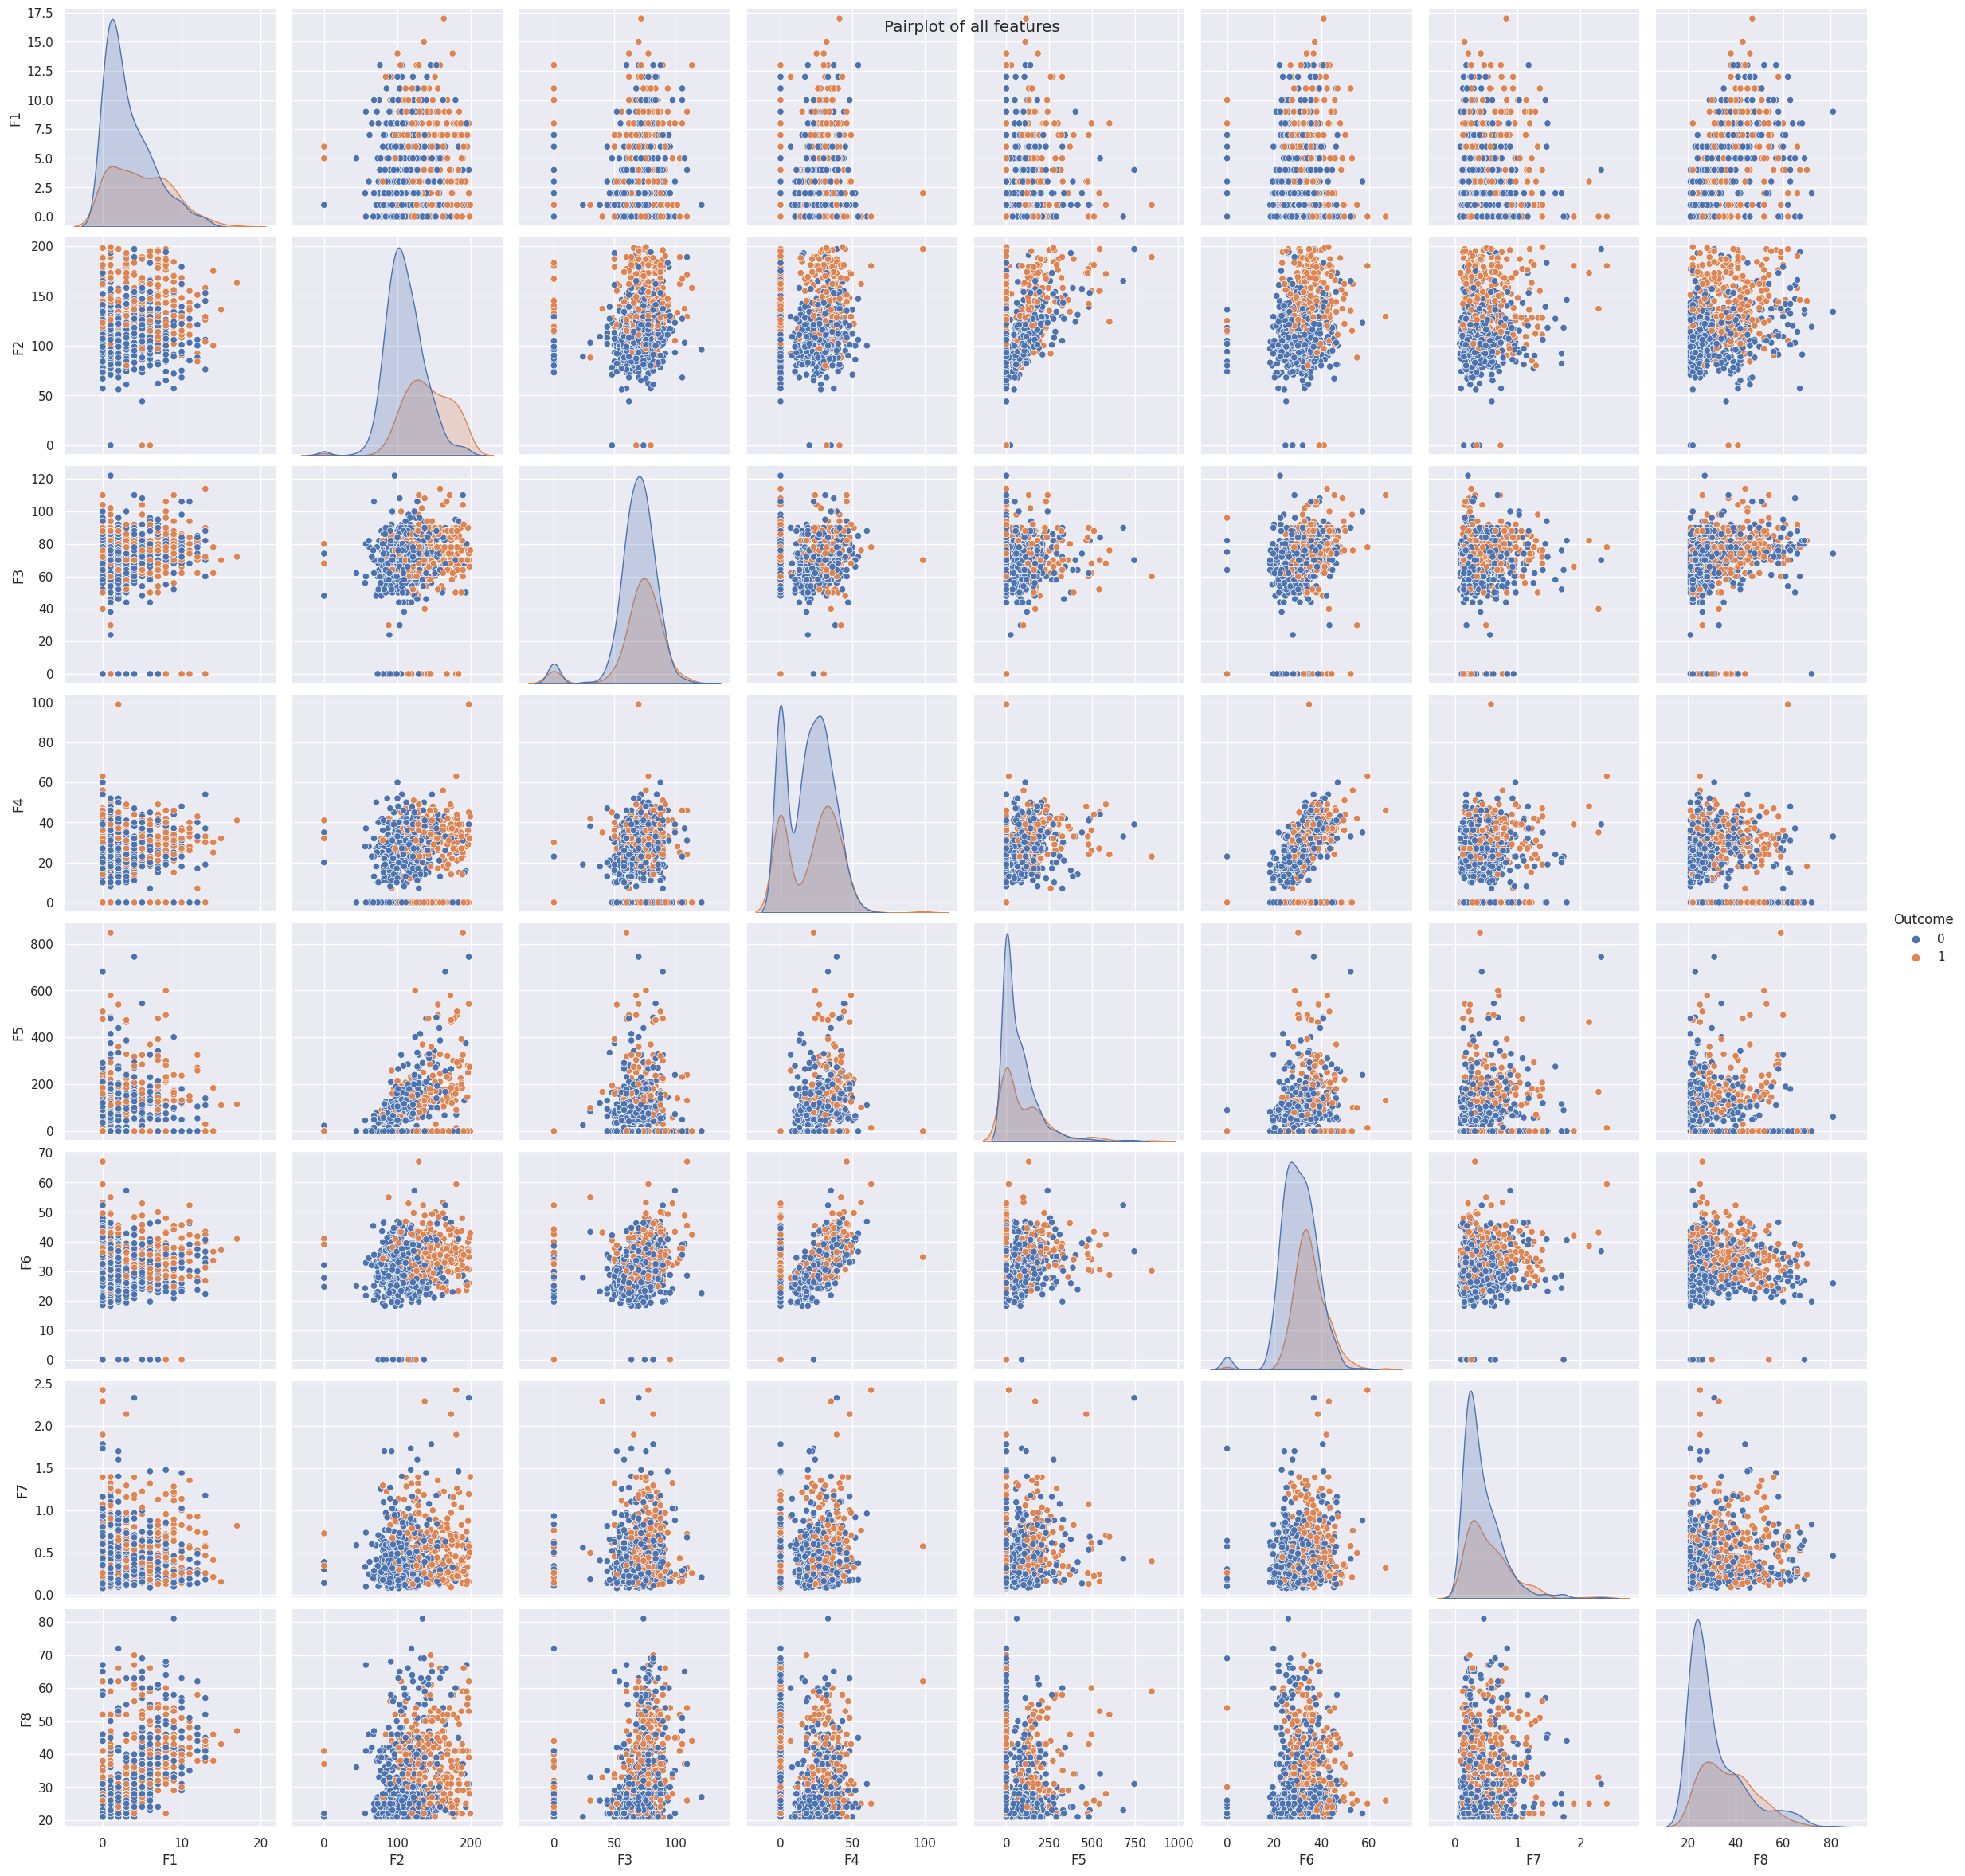

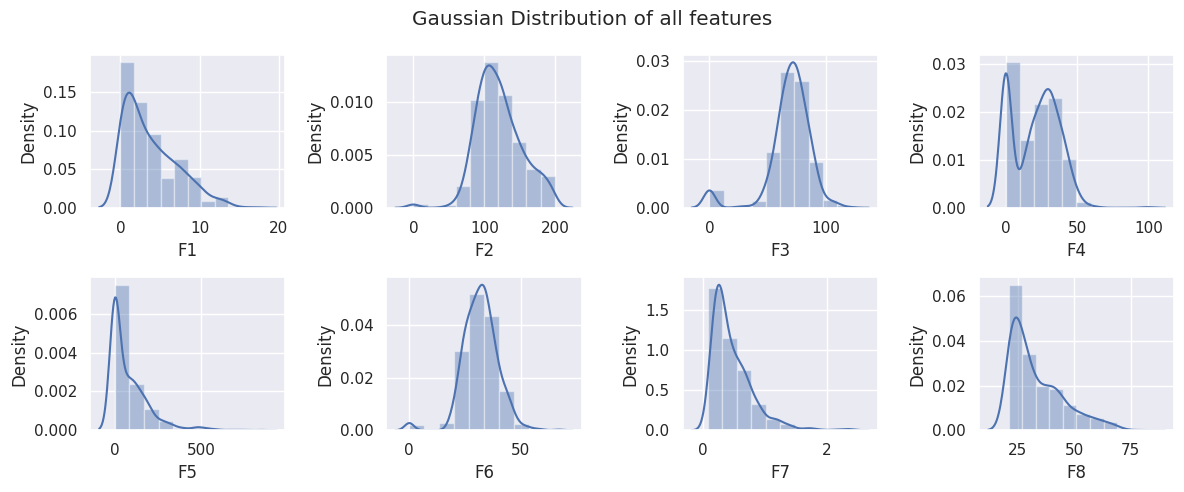

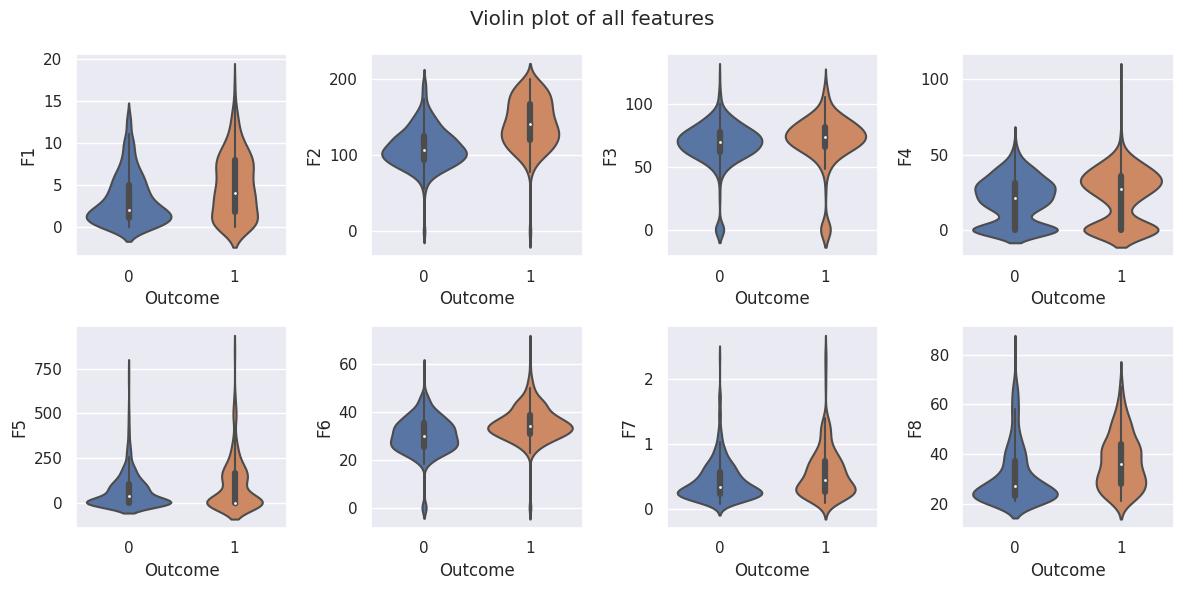

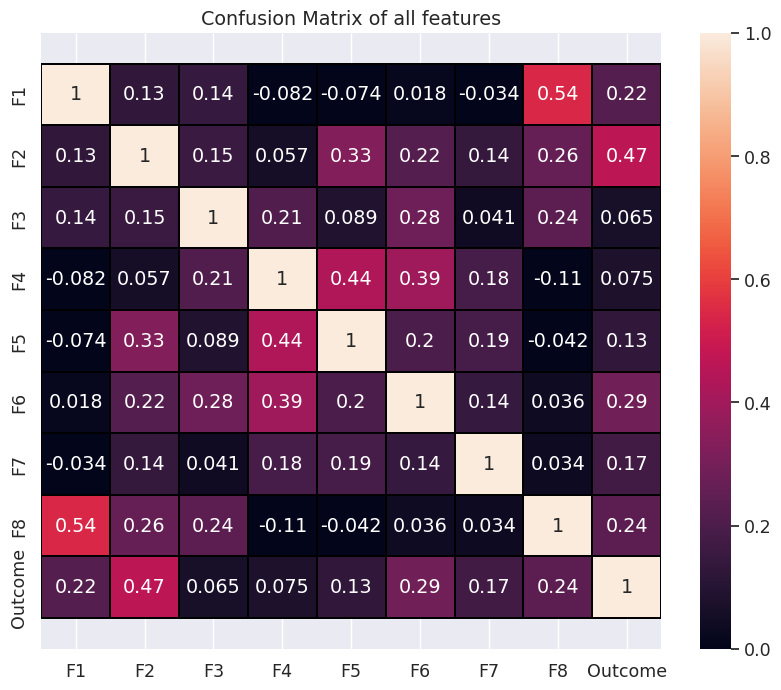

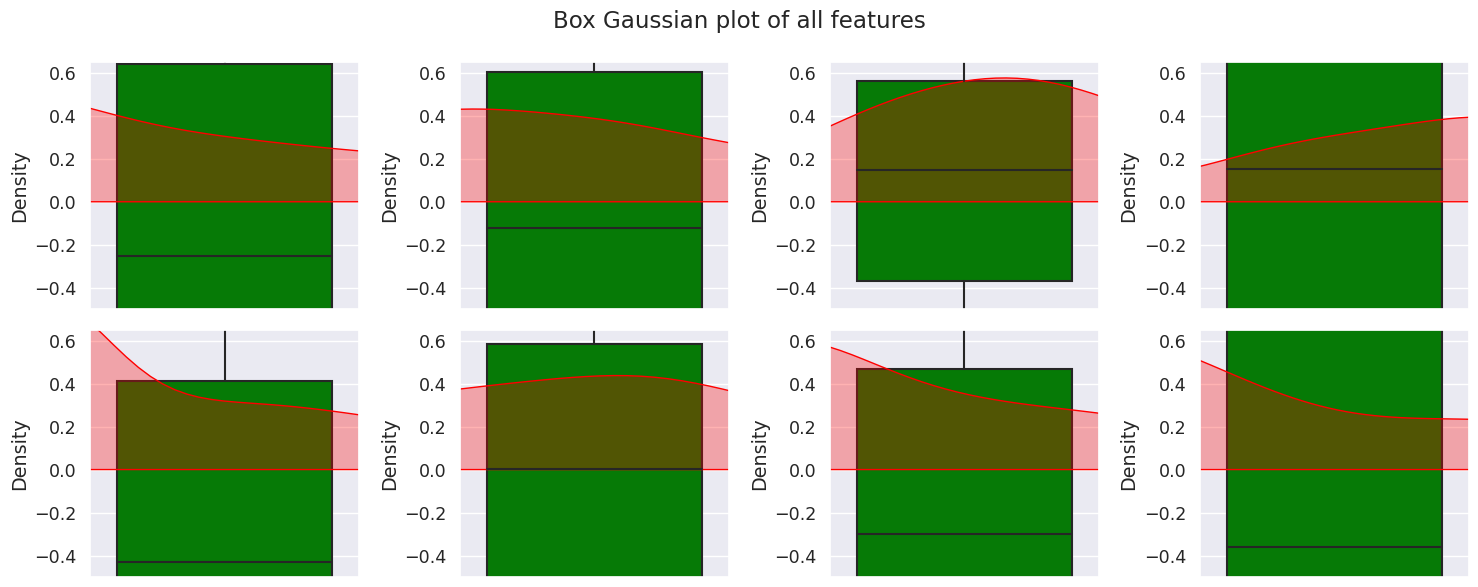

In [68]:
data_plot (loaded_data,
          box_Gaussian=True,
          Plot_violinplot=True,
          Dist_Plot=True,
          Pair_plot=True,
          Plot_confusionMatrix=True,
          )

# Let's do the Preprocessing; most of the time takes for this stage  

### Preprocessing Selection
---
Process Selector | Preprocessing | 
---|---|
P|Outlier Rejection|
Q|Filling Missing Value|
R|Standardization|

**Each P, Q, and R process has four techniques for feature selection which are N/A, PCA, ICA, and correlation-based feature selection**

In [69]:
print('Before removing outliers : ' + str(loaded_data.shape))
##-------------------------------------------------################
loaded_data = outlier_Rejection (loaded_data,
                  iqr_Mean=False,
                  iqr_Medain=False,
                  iqr=True,
                  manual=False)
print('After outlier were removed : ' + str(loaded_data.shape))

Before removing outliers : (768, 9)
After outlier were removed : (768, 9)


In [70]:
loaded_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [71]:
X_loaded_data,Target_Variable = feature_Selector(loaded_data, algo='None', n_feature=6)    
print('Shape After Feature Selection: ' + str(loaded_data.shape))

Shape After Feature Selection: (768, 9)


Defining K-fold values; 10 here

In [73]:
kf = StratifiedKFold(n_splits=10,
                     shuffle=True,
                     random_state=random_initializer)

###KNN model

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.71      0.84      0.77        50
           1       0.56      0.37      0.44        27

    accuracy                           0.68        77
   macro avg       0.63      0.61      0.61        77
weighted avg       0.66      0.68      0.66        77


Area Under ROC (AUC): 0.7188888888888889

Confusion Matrix for current fold: 
[[42  8]
 [17 10]]

Accuracy for Current Fold: 0.6753246753246753

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        50
           1       0.75      0.44      0.56        27

    accuracy                           0.75        77
   macro avg       0.75      0.68      0.69        77
weighted avg       0.75      0.75      0.73        77

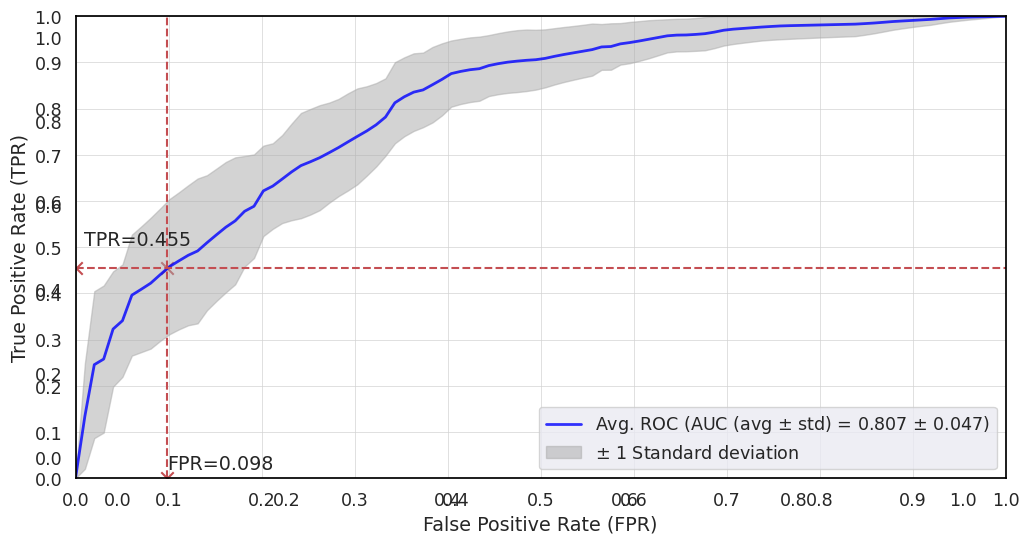


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.807 +/- 0.047
Accuracy (Avg. +/- Std.) is  0.746 +/- 0.057
Avg. CM is [[12, 4], [14, 45]]
Total for all folds CM is [[122, 49], [146, 451]]


In [74]:
iterator=0
FP = []                                                                      # For False Positive 
FN = []                                                                      # Stores False Negative
TP = []                                                                      # To store True Positive
TN = []                                                                      # To store True Negative
tprs = []                                                                    # True positive
Accuracy = []                                                                # Stores Accuracy 
aucs_kNN = []                                                                # Stores AUC
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(12, 6))

for train_index, test_index in kf.split(X_loaded_data,Target_Variable):        
    X_Train, X_Test = X_loaded_data[train_index], X_loaded_data[test_index]    
    Y_Train, Y_Test = Target_Variable[train_index], Target_Variable[test_index]

    # Hyperparameters
    n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
    leaf_size = [5,10,15,20,25,30,35,40,45,50]
    Distance = [1,2]

    tuned_parameters = [ {'n_neighbors': n_neighbors,
                        'algorithm' : ['brute'],
                        'p':Distance},
                         {'n_neighbors': n_neighbors, 
                        'algorithm' : ['ball_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance},
                        {'n_neighbors': n_neighbors, 
                        'algorithm' : ['kd_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance}]
    clf = New_Model (classifier = KNeighborsClassifier(),                     #create the model 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,               #get the values of  model evaluation 
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))                                     
    tprs[-1][0] = 0.0
    aucs_kNN.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                                 #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_kNN,TP,TN,FP,FN)                                 #plot average roc curve
average_performance(aucs_kNN,Accuracy,TP,TN,FP,FN)                              #print the average performance of the model

### Analyzing  Decision Trees Classifier

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        50
           1       0.68      0.56      0.61        27

    accuracy                           0.75        77
   macro avg       0.73      0.71      0.72        77
weighted avg       0.75      0.75      0.75        77


Area Under ROC (AUC): 0.8129629629629629

Confusion Matrix for current fold: 
[[43  7]
 [12 15]]

Accuracy for Current Fold: 0.7532467532467533

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        50
           1       0.65      0.56      0.60        27

    accuracy                           0.74        77
   macro avg       0.71      0.70      0.70        77
weighted avg       0.73      0.74      0.73        77

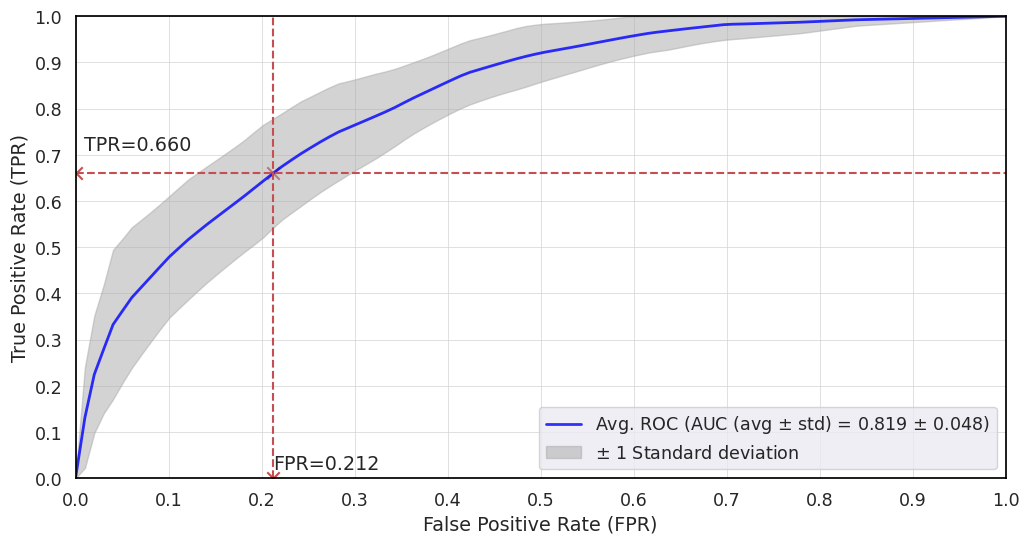


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.819 +/- 0.048
Accuracy (Avg. +/- Std.) is  0.743 +/- 0.034
Avg. CM is [[17, 10], [9, 39]]
Total for all folds CM is [[177, 106], [91, 394]]


In [76]:
iterator=0
FP = []                                                                      # For False Positive 
FN = []                                                                      # Stores False Negative
TP = []                                                                      # To store True Positive
TN = []                                                                      # To store True Negative
tprs = []                                                                    # True positive
Accuracy = []                                                                # Stores Accuracy 
aucs_Tree = []                                                                # Stores AUC
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(12, 6))

for train_index, test_index in kf.split(X_loaded_data,Target_Variable):        
    X_Train, X_Test = X_loaded_data[train_index], X_loaded_data[test_index]    
    Y_Train, Y_Test = Target_Variable[train_index], Target_Variable[test_index]

    # Hyperparameters
    tuned_parameters = {'criterion': ['gini','entropy'],
                       'splitter': ['best'],
                       'min_samples_split':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                       'min_samples_leaf': [1,2,3,4,5] }

    clf = New_Model (classifier = DecisionTreeClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                    # create the model using DecisionTree Classifier 
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,           #get the evaluation parameters of model
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_Tree.append(roc_auc)                                                # plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_Tree,TP,TN,FP,FN)                             #plot average roc curve
average_performance(aucs_Tree,Accuracy,TP,TN,FP,FN)                          #print the average performance of the model

### Analyzing Random Forest Classifier

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        50
           1       0.61      0.52      0.56        27

    accuracy                           0.71        77
   macro avg       0.68      0.67      0.67        77
weighted avg       0.71      0.71      0.71        77


Area Under ROC (AUC): 0.764074074074074

Confusion Matrix for current fold: 
[[41  9]
 [13 14]]

Accuracy for Current Fold: 0.7142857142857143

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        50
           1       0.68      0.48      0.57        27

    accuracy                           0.74        77
   macro avg       0.72      0.68      0.69        77
weighted avg       0.73      0.74      0.73        77


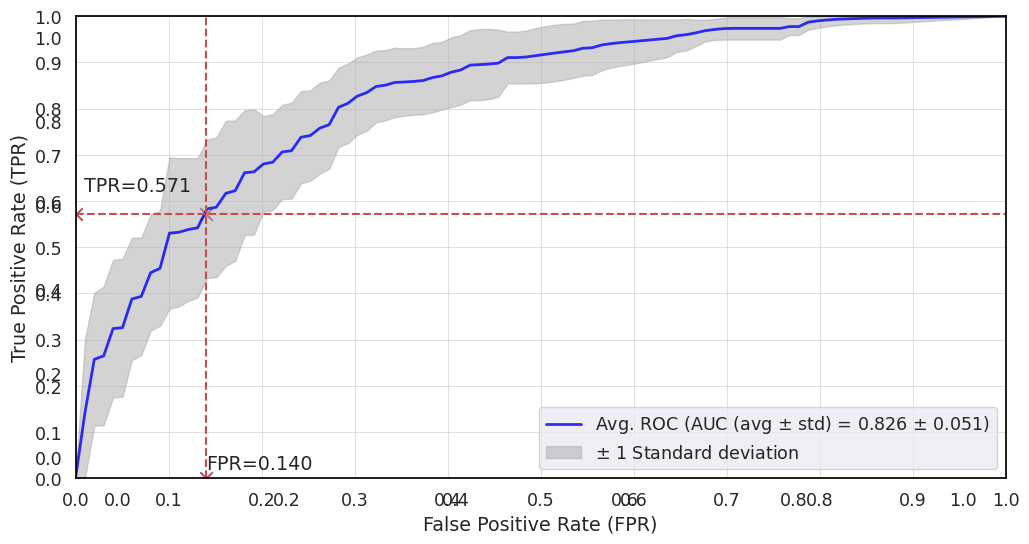


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.826 +/- 0.051
Accuracy (Avg. +/- Std.) is  0.759 +/- 0.046
Avg. CM is [[15, 7], [11, 43]]
Total for all folds CM is [[153, 70], [115, 430]]


In [77]:
iterator=0
FP = []                                                                      # For False Positive 
FN = []                                                                      # Stores False Negative
TP = []                                                                      # To store True Positive
TN = []                                                                      # To store True Negative
tprs = []                                                                    # True positive
Accuracy = []                                                                # Stores Accuracy 
aucs_Forest = []                                                                # Stores AUC
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(12, 6))

for train_index, test_index in kf.split(X_loaded_data,Target_Variable):        
    X_Train, X_Test = X_loaded_data[train_index], X_loaded_data[test_index]    
    Y_Train, Y_Test = Target_Variable[train_index], Target_Variable[test_index]

    # Hyperparameters
    tuned_parameters = {'criterion': ['gini','entropy']}

    clf = New_Model (classifier = RandomForestClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                      # create a model using random forest classifier
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,              #evaluation parameters of random forest model
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_Forest.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                               #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_Forest,TP,TN,FP,FN)                            #plot average roc curve
average_performance(aucs_Forest,Accuracy,TP,TN,FP,FN)                         #print the average performance of the model

SVM

In [ ]:
from sklearn.svm import SVC

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        50
           1       0.65      0.48      0.55        27

    accuracy                           0.73        77
   macro avg       0.70      0.67      0.68        77
weighted avg       0.72      0.73      0.72        77


Area Under ROC (AUC): 0.7925925925925925

Confusion Matrix for current fold: 
[[43  7]
 [14 13]]

Accuracy for Current Fold: 0.7272727272727273

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        50
           1       0.65      0.48      0.55        27

    accuracy                           0.73        77
   macro avg       0.70      0.67      0.68        77
weighted avg       0.72      0.73      0.72        77

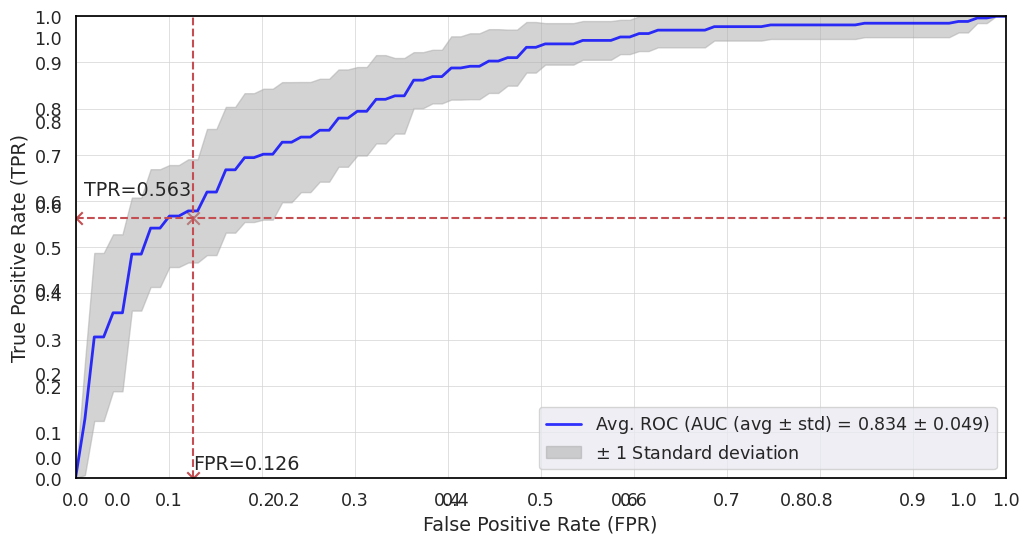


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.834 +/- 0.049
Accuracy (Avg. +/- Std.) is  0.766 +/- 0.053
Avg. CM is [[15, 6], [11, 43]]
Total for all folds CM is [[151, 63], [117, 437]]


In [78]:
iterator=0
FP = []                                                                      # For False Positive 
FN = []                                                                      # Stores False Negative
TP = []                                                                      # To store True Positive
TN = []                                                                      # To store True Negative
tprs = []                                                                    # True positive
Accuracy = []                                                                # Stores Accuracy 
aucs_svm = []                                                                # Stores AUC
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(12, 6))

for train_index, test_index in kf.split(X_loaded_data,Target_Variable):        
    X_Train, X_Test = X_loaded_data[train_index], X_loaded_data[test_index]    
    Y_Train, Y_Test = Target_Variable[train_index], Target_Variable[test_index]

    # Hyperparameters
    tuned_parameters = [{'kernel': ['rbf','linear']}]


    ##-------------------------------------------------###
    clf = New_Model (classifier = SVC(random_state=0,probability=True),
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters=tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,             # model evaluation parameters
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_svm.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                               #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_svm,TP,TN,FP,FN)                               #plot average roc curve
average_performance(aucs_svm,Accuracy,TP,TN,FP,FN)                            #print the average performance of the model

### Analyzing Naive Bayes Model

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        50
           1       0.57      0.44      0.50        27

    accuracy                           0.69        77
   macro avg       0.65      0.63      0.64        77
weighted avg       0.68      0.69      0.68        77


Area Under ROC (AUC): 0.7622222222222221

Confusion Matrix for current fold: 
[[41  9]
 [15 12]]

Accuracy for Current Fold: 0.6883116883116883

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        50
           1       0.67      0.67      0.67        27

    accuracy                           0.77        77
   macro avg       0.74      0.74      0.74        77
weighted avg       0.77      0.77      0.77        77

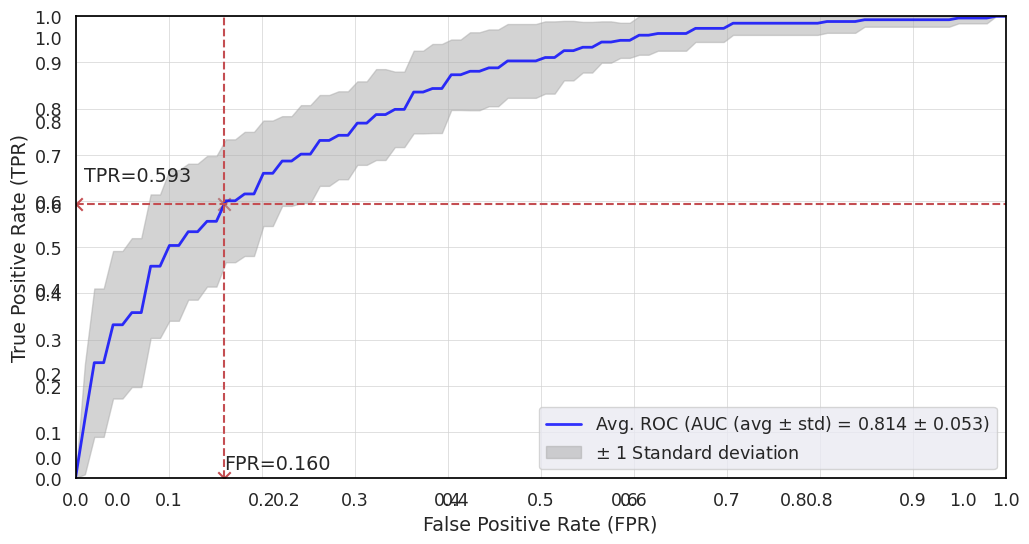


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.814 +/- 0.053
Accuracy (Avg. +/- Std.) is  0.754 +/- 0.064
Avg. CM is [[15, 8], [10, 42]]
Total for all folds CM is [[159, 80], [109, 420]]


In [79]:
iterator=0
FP = []                                                                      # For False Positive 
FN = []                                                                      # Stores False Negative
TP = []                                                                      # To store True Positive
TN = []                                                                      # To store True Negative
tprs = []                                                                    # True positive
Accuracy = []                                                                # Stores Accuracy 
aucs_NB = []                                                                # Stores AUC
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(12, 6))

for train_index, test_index in kf.split(X_loaded_data,Target_Variable):        
    X_Train, X_Test = X_loaded_data[train_index], X_loaded_data[test_index]    
    Y_Train, Y_Test = Target_Variable[train_index], Target_Variable[test_index]

    # Hyperparameters
    var_smoothing = [1e-01,
                    1e-02,
                    1e-03,
                    1e-04,
                    1e-05,
                    1e-06,
                    1e-07,
                    1e-08,
                    1e-09,
                    1e-10,
                    1e-11,
                    1e-12]

    tuned_parameters = [{'var_smoothing': var_smoothing}]

    ##-------------------------------------------------###
    clf = New_Model (classifier = GaussianNB(),                             # create model using Naive Bias
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,             # model evaluation parameters
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_NB.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                               #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_NB,TP,TN,FP,FN)                               #plot average roc curve
average_performance(aucs_NB,Accuracy,TP,TN,FP,FN)                            #print the average performance of the model

In [80]:
print('Finished')

Finished


In [ ]:
%%shell
jupyter nbconvert --to html Final.ipynb